In [1]:
# knn_kval.ipynb
# 18 Jun 2025
# Finding Optimal K Value and Comparing Distance Metrics

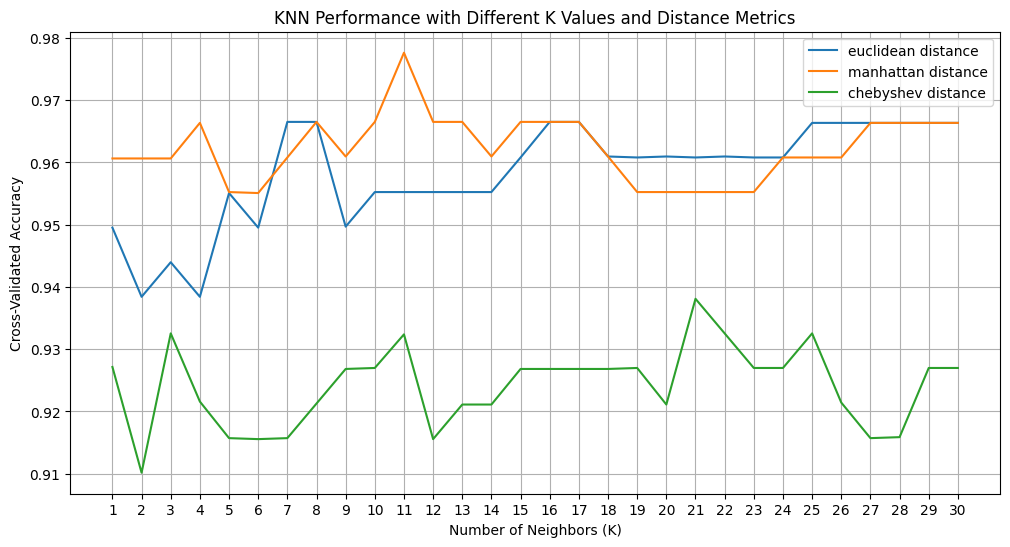

Optimal K for euclidean: 7 (accuracy: 0.967)
Optimal K for manhattan: 11 (accuracy: 0.978)
Optimal K for chebyshev: 21 (accuracy: 0.938)


In [2]:
"""
Finding Optimal K Value and Comparing Distance Metrics
This program demonstrates:
1. How to choose the optimal K value using cross-validation
2. Comparing different distance metrics
3. Plotting accuracy vs K value
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Test different K values and distance metrics
k_range = range(1, 31)
metrics = ['euclidean', 'manhattan', 'chebyshev']
cv_scores = {metric: [] for metric in metrics}

for metric in metrics:
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
        cv_scores[metric].append(scores.mean())

# Plot results
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(k_range, cv_scores[metric], label=f'{metric} distance')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Performance with Different K Values and Distance Metrics')
plt.legend()
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Find optimal K for each metric
for metric in metrics:
    optimal_k = k_range[np.argmax(cv_scores[metric])]
    max_acc = max(cv_scores[metric])
    print(f"Optimal K for {metric}: {optimal_k} (accuracy: {max_acc:.3f})")